This program will collect real time pricing information from various MISO hub locations
- Each day of the real time pricing will be extracted and flattened to create a rate curve for each day
- A user will then say how much storage capacity they have and how fast their rate of charge is 
- The program will then decide how many hours of charging you will need in a day + a factor of safety of 1.5
- Knowing the hours of charging each day, we can select the lowest portion of the pricing to fulfill the charging need 
* then apply this to every day
- Once this is completed, the program will average the cost per kw/h using storage over the year vs the average cost per kw/h 


1. Bring in the hub spot price
- get necesssary packages
- pull data
- put into necessary format

In [3]:
import numpy as np
import operator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv('Data/2022MISOActualHUBEnergyPrice.csv')

#create a new column called day in df that has just the date and not the time from the Date column
df['Day'] = df['Date'].str.split(' ').str[0]
display(df)


,Date,LMP,HUB,Day
0,1/1/22 0:00,27.12,ARKANSAS.HUB,1/1/22
1,1/1/22 0:00,22.46,ILLINOIS.HUB,1/1/22
2,1/1/22 0:00,23.39,INDIANA.HUB,1/1/22
3,1/1/22 0:00,28.56,TEXAS.HUB,1/1/22
4,1/1/22 0:00,28.72,LOUISIANA.HUB,1/1/22
...,...,...,...,...
65701,12/31/22 22:00,24.54,MICHIGAN.HUB,12/31/22
65702,12/31/22 22:00,23.07,MINN.HUB,12/31/22
65703,12/31/22 22:00,23.40,MS.HUB,12/31/22
65704,12/31/22 22:00,22.92,ARKANSAS.HUB,12/31/22


Each day of the real time pricing will be extracted and flattened to create a rate curve for each day
* isolate by each state
* 


In [2]:
#find the average LMP value for each item in the HUB column
dfHub = df.groupby('HUB')
dfHubMean = dfHub.mean()

#add indexes to the dfHubMean dataframe
dfHubMean = dfHubMean.reset_index()
display(dfHubMean)

,HUB,LMP
0,ARKANSAS.HUB,60.545411
1,ILLINOIS.HUB,62.372551
2,INDIANA.HUB,72.098010
3,LOUISIANA.HUB,62.974997
4,MICHIGAN.HUB,66.382847
5,MINN.HUB,44.336118
6,MS.HUB,61.511871
7,TEXAS.HUB,62.304199


In [3]:
#for each HUB, group the data by day and find the average LMP value for each day
dfHubDay = df.groupby(['HUB', 'Day'])

#sort LMP values in dfHubDay from lowest to highest LMP value
dfHubDaySorted = dfHubDay.mean().sort_values(by=['LMP'], ascending=True)
#display first ten rows of dfHubDaySorted
display(dfHubDay.head(10))









,Date,LMP,HUB,Day
0,1/1/22 0:00,27.12,ARKANSAS.HUB,1/1/22
1,1/1/22 0:00,22.46,ILLINOIS.HUB,1/1/22
2,1/1/22 0:00,23.39,INDIANA.HUB,1/1/22
3,1/1/22 0:00,28.56,TEXAS.HUB,1/1/22
4,1/1/22 0:00,28.72,LOUISIANA.HUB,1/1/22
...,...,...,...,...
65597,12/31/22 9:00,25.44,INDIANA.HUB,12/31/22
65598,12/31/22 9:00,23.66,LOUISIANA.HUB,12/31/22
65599,12/31/22 9:00,25.45,MICHIGAN.HUB,12/31/22
65600,12/31/22 9:00,22.21,MINN.HUB,12/31/22


In [4]:
#seperate the state
dfIllinois = df[df['HUB'] == 'ILLINOIS.HUB']
dfIllinoisDay = dfIllinois.groupby('Day')
#sort the values by day and order them from smallest to largest and display only the first 10 rows (out of 24) for each day 
dfIllinoisSort = dfIllinois.sort_values(['Day','LMP'],ascending=True).groupby('Day').head(10)
#get the mean LMP value for dfIllinoisSort
dfIllinoisSortMean = dfIllinoisSort['LMP'].mean()
display(dfIllinoisSortMean)

#repeat the above steps for all of the items in the HUB column
dfIndiana = df[df['HUB'] == 'INDIANA.HUB']
dfIndianaDay = dfIndiana.groupby('Day')
dfIndianaSort = dfIndiana.sort_values(['Day','LMP'],ascending=True).groupby('Day').head(10)
dfIndianaSortMean = dfIndianaSort['LMP'].mean()
display(dfIndianaSortMean)

dfMichigan = df[df['HUB'] == 'MICHIGAN.HUB']
dfMichiganDay = dfMichigan.groupby('Day')
dfMichiganSort = dfMichigan.sort_values(['Day','LMP'],ascending=True).groupby('Day').head(10)
dfMichiganSortMean = dfMichiganSort['LMP'].mean()
display(dfMichiganSortMean)

dfArkansas = df[df['HUB'] == 'ARKANSAS.HUB']
dfArkansasDay = dfArkansas.groupby('Day')
dfArkansasSort = dfArkansas.sort_values(['Day','LMP'],ascending=True).groupby('Day').head(10)
dfArkansasSortMean = dfArkansasSort['LMP'].mean()
display(dfArkansasSortMean)

dfLouisiana = df[df['HUB'] == 'LOUISIANA.HUB']
dfLouisianaDay = dfLouisiana.groupby('Day')
dfLouisianaSort = dfLouisiana.sort_values(['Day','LMP'],ascending=True).groupby('Day').head(10)
dfLouisianaSortMean = dfLouisianaSort['LMP'].mean()
display(dfLouisianaSortMean)

dfMississippi = df[df['HUB'] == 'MS.HUB']
dfMississippiDay = dfMississippi.groupby('Day')
dfMississippiSort = dfMississippi.sort_values(['Day','LMP'],ascending=True).groupby('Day').head(10)
dfMississippiSortMean = dfMississippiSort['LMP'].mean()
display(dfMississippiSortMean)

dfTexas = df[df['HUB'] == 'TEXAS.HUB']
dfTexasDay = dfTexas.groupby('Day')
dfTexasSort = dfTexas.sort_values(['Day','LMP'],ascending=True).groupby('Day').head(10)
dfTexasSortMean = dfTexasSort['LMP'].mean()
display(dfTexasSortMean)

dfMinn = df[df['HUB'] == 'MINN.HUB']
dfMinnDay = dfMinn.groupby('Day')
dfMinnSort = dfMinn.sort_values(['Day','LMP'],ascending=True).groupby('Day').head(10)
dfMinnSortMean = dfMinnSort['LMP'].mean()
display(dfMinnSortMean)

#Combine into a list
ListOfStateAverages = dfMinnSortMean, dfIllinoisSortMean, dfIndianaSortMean, dfMichiganSortMean, dfArkansasSortMean, dfLouisianaSortMean, dfMississippiSortMean, dfTexasSortMean
States = ['Minnesota', 'Illinois', 'Indiana', 'Michigan', 'Arkansas', 'Louisiana', 'Mississippi', 'Texas']

dfHUBAverages = pd.DataFrame({'State': States, 'Average Discounted LMP': ListOfStateAverages})
#sort states by alphabetical order
dfHUBAverages.sort_values(by=['State'], inplace=True)

#add another column that takes the LMP values from dfHUBMean
dfHUBAverages['Average LMP'] = dfHubMean['LMP']

display(dfHUBAverages)



42.154428610578236

50.63027130720745

47.50397369142231

44.34481775828994

45.955324746505894

44.73228829816388

45.82281995067142

25.93127980268567

,State,Average Discounted LMP,Average LMP
4,Arkansas,44.344818,66.382847
1,Illinois,42.154429,62.372551
2,Indiana,50.630271,72.098010
5,Louisiana,45.955325,44.336118
3,Michigan,47.503974,62.974997
0,Minnesota,25.931280,60.545411
6,Mississippi,44.732288,61.511871
7,Texas,45.822820,62.304199


<AxesSubplot:title={'center':'Average LMP by State'}, xlabel='State'>

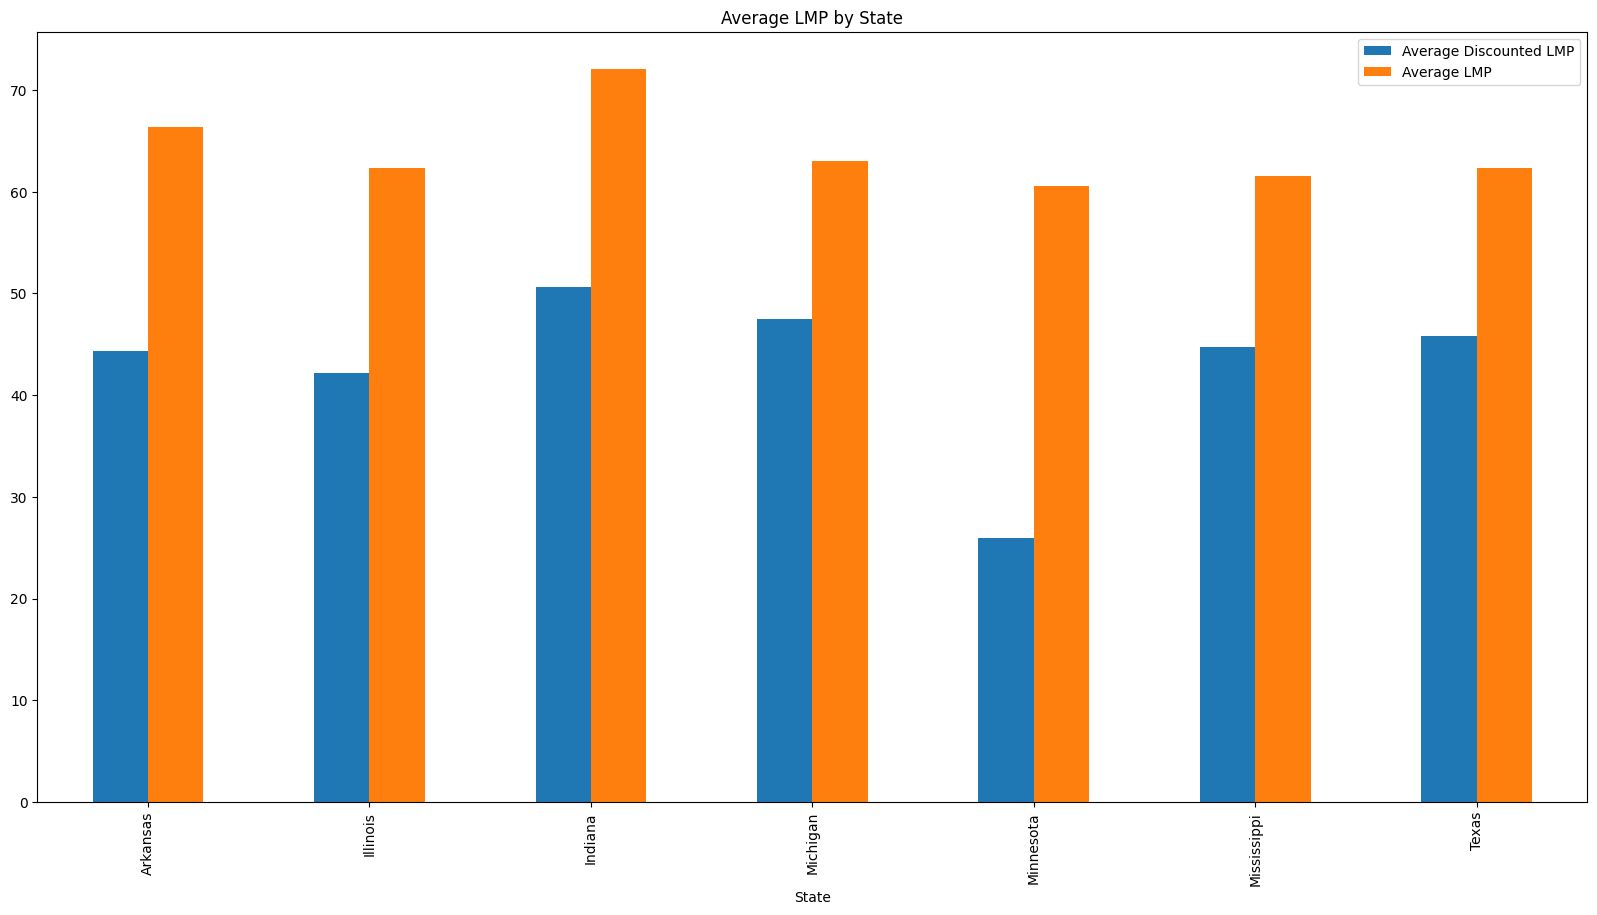

In [5]:
#group alphatbetically by state
dfHUBAverages.sort_values(by=['State'], inplace=True)   

#remove louisiana from the plot
dfHUBAverages = dfHUBAverages[dfHUBAverages.State != 'Louisiana']
#plot the data except for louisiana
dfHUBAverages.plot(x='State', y=['Average Discounted LMP', 'Average LMP'], kind='bar', figsize=(20,10), title='Average LMP by State')




In [11]:

dfNodesOctDec = pd.read_csv('Data/2022_Oct-Dec_RT_LMPs_Cleaned.csv')



In [12]:
#group by NODE
dfNodesOctDecGroup = dfNodesOctDec.groupby('NODE')
#show first 10 rows of dfNodesOctDecGroup
display(dfNodesOctDecGroup.head(10))

#create list of nodes
ListOfNodes = dfNodesOctDec['NODE'].unique()

dfListOfNodes = pd.DataFrame(ListOfNodes, columns=['NODE'])
display(dfListOfNodes)


,MARKET_DAY,NODE,TYPE,VALUE,HE1,HE2,HE3,HE4,HE5,HE6,...,HE15,HE16,HE17,HE18,HE19,HE20,HE21,HE22,HE23,HE24
0,10/1/22,AEP.PSGC1.AMP,Gennode,LMP,15.72,20.09,27.47,38.75,41.85,44.41,...,49.06,53.68,48.43,50.93,52.24,46.76,34.17,30.51,-5.31,11.69
1,10/1/22,AEP.PSGC2.AMP,Gennode,LMP,15.72,20.09,27.47,38.75,41.85,44.41,...,49.06,53.68,48.43,50.93,52.24,46.76,34.17,30.51,-5.31,11.69
2,10/1/22,AEP.WVPA.GIB5,Gennode,LMP,49.99,35.54,36.78,40.55,43.63,46.24,...,50.97,55.84,50.22,52.72,54.17,48.73,39.15,38.59,30.18,31.16
3,10/1/22,ALTE.1ROCKGEN,Gennode,LMP,59.45,42.63,41.03,41.74,42.91,45.78,...,51.13,55.88,50.26,53.03,54.59,49.03,40.18,37.41,25.15,27.88
4,10/1/22,ALTE.BEARCRK,Gennode,LMP,52.14,33.79,35.95,40.89,44.30,47.53,...,49.75,54.22,49.02,53.67,57.48,51.69,44.61,38.86,25.56,28.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100957,12/10/22,CONS.COVERT3S,Gennode,LMP,125.01,164.25,37.60,50.40,89.80,146.87,...,48.85,50.67,50.93,50.80,52.46,45.72,57.50,61.30,45.50,40.25
101454,12/10/22,MDU.HESKET_4,Gennode,LMP,114.96,149.85,34.00,36.74,51.64,92.14,...,47.52,48.57,48.75,49.03,51.68,44.39,55.54,58.81,43.95,38.47
101796,12/10/22,OTP.GRE.DEUEL,Gennode,LMP,114.02,148.07,33.60,36.04,50.28,90.13,...,46.46,47.17,47.42,47.89,50.73,43.48,54.53,58.50,44.46,39.32
101911,12/10/22,WEC.PARISSLR1,Gennode,LMP,123.65,162.09,36.97,37.28,47.53,91.72,...,49.02,50.53,50.69,50.82,52.61,45.75,57.32,60.94,45.22,39.86


,NODE
0,AEP.PSGC1.AMP
1,AEP.PSGC2.AMP
2,AEP.WVPA.GIB5
3,ALTE.1ROCKGEN
4,ALTE.BEARCRK
...,...
1443,CONS.COVERT3S
1444,MDU.HESKET_4
1445,OTP.GRE.DEUEL
1446,WEC.PARISSLR1


In [13]:
x = 10 

#for each NODE in dfNodesOctDecGroup
for node in ListOfNodes:
    
    # #seperate out by node
    dfNodesOctDecGroupNode = dfNodesOctDecGroup.get_group(node)
    
    #Create a new df with HE1-HE24 columns
    dfNodesOctDecGroupNodeHE = dfNodesOctDecGroupNode[['HE1','HE2','HE3','HE4','HE5','HE6','HE7','HE8','HE9','HE10','HE11','HE12','HE13','HE14','HE15','HE16','HE17','HE18','HE19','HE20','HE21','HE22','HE23','HE24']]

    #convert these to floats
    dfNodesOctDecGroupNodeHE = dfNodesOctDecGroupNodeHE.astype(float)

    #create columns that are sorted
    (dfNodesOctDecGroupNodeHE['0'], dfNodesOctDecGroupNodeHE['1'], dfNodesOctDecGroupNodeHE['2'], dfNodesOctDecGroupNodeHE['3'], dfNodesOctDecGroupNodeHE['4'], dfNodesOctDecGroupNodeHE['5'], dfNodesOctDecGroupNodeHE['6'], dfNodesOctDecGroupNodeHE['7'],
        dfNodesOctDecGroupNodeHE['8'], dfNodesOctDecGroupNodeHE['9'], dfNodesOctDecGroupNodeHE['10'], dfNodesOctDecGroupNodeHE['11'], dfNodesOctDecGroupNodeHE['12'], dfNodesOctDecGroupNodeHE['13'], dfNodesOctDecGroupNodeHE['14'], dfNodesOctDecGroupNodeHE['15'],
        dfNodesOctDecGroupNodeHE['16'], dfNodesOctDecGroupNodeHE['17'], dfNodesOctDecGroupNodeHE['18'], dfNodesOctDecGroupNodeHE['19'], dfNodesOctDecGroupNodeHE['20'], dfNodesOctDecGroupNodeHE['21'], dfNodesOctDecGroupNodeHE['22'], 
        dfNodesOctDecGroupNodeHE['23'])= np.sort(dfNodesOctDecGroupNodeHE, axis=1)[:, :24].T
    
    #get mean of x lowest and put in column lowest mean
    dfNodesOctDecGroupNodeHE['lowestMean'] = dfNodesOctDecGroupNodeHE.iloc[:, 25:(25+x)].mean(axis=1) 
       
    #get mean of all of the values in column 'lowestMean'ArithmeticError
    dfNodesOctDecGroupNodeHE['lowestMean'].mean()

    #add the mean to the dfListOfNodes
    dfListOfNodes.loc[dfListOfNodes['NODE'] == node, 'lowestMean'] = dfNodesOctDecGroupNodeHE['lowestMean'].mean()
    
    
display(dfListOfNodes)

,NODE,lowestMean
0,AEP.PSGC1.AMP,41.279283
1,AEP.PSGC2.AMP,41.279283
2,AEP.WVPA.GIB5,46.153696
3,ALTE.1ROCKGEN,37.819141
4,ALTE.BEARCRK,36.798652
...,...,...
1443,CONS.COVERT3S,50.151548
1444,MDU.HESKET_4,22.529871
1445,OTP.GRE.DEUEL,12.868935
1446,WEC.PARISSLR1,42.073613
